-----
## Práctico Análisis y Visualización

El siguiente trabajo esta pensado para ser entregado en formato de tipo informe en un notebook Python hecho en Jupyter Lab o Google Colab. Debera apuntar a un público técnico con conocimientos generales del tema. 

La presentación de los resultados debe ser clara, apoyar las conclusiones extraidas y ser lo mas sintetico posible. No necesariamente todo lo que prueben debe estar reflejado en el informe. Ciertamente valoramos el esfuerzo de explorar alternativas de análisis y visualización, pero parte del trabajo es elegir también las mas adecuadas. 

----

## Consignas

### 1. Armado del dataset

Inicialmente nuestro conjunto de datos se encuentra distribuido en varios archivos. Es necesario juntar todo en un mismo set de datos para facilitar la manipulacion. 

- Describir las caracteristicas generales de los datasets presentes en los archivos de entrada: Numero de registros, diferencias entre los mismos. 
- Definir conveniencia de usar todos los datos juntos en un mismo dataset o separarlos. 

### 2. Exploración

- De que consta nuestro dataset? que tipo de datos tenemos?
- Nuestra variable a predecir, esta balanceada dentro del dataset etiquetado?
- Que tipo de curacion creen que seria necesaria realizar? Existen datos nulos?
- En base a lo que podemos entender conceptualmente sobre nuestras variables, existe alguna que a priori pueda tener una mayor influencia sobre nuestro objetivo a predecir? por qué?
- Existe correlacion entre las variables del dataset? Cual metodo de cálculo de correlacion conviene usar para este tipo de variables?

### 3. Visualización

- Como se distribuyen las variables? Cuales siguen una distribucion normal y cuales no?
- Explorar las diferencias entre las distribuciones de las distintas variables: 
  - según el paciente
  - según la etiqueta a predecir
  - ambas (usar hue)
- Hay outliers presentes en nuestras distribuciones? habria que sacarlos?

### **Sobre los datos no etiquetados**

Si bien todavia no vamos a predecir una etiqueta, nos interesa entender lo mas posible sobre estos datos para poder entender las predicciones de los modelos.

- Visualizar las distribuciones de las distintas metricas. Se comportan parecido a los etiquetados si eliminaramos las etiquetas? y si las consideramos?

### 4. Conclusiones

Sobre los datos etiquetados: 
- En base al análisis, se pudo encontrar cual(es) son las métricas que mejor diferencian un estado de otro?

Sobre los no etiquetados:
- Conviene analizarlos junto con los que si estan etiquetados? 

### 5. Opcional: Analizar las señales originales y obtener un nuevo cuantificador.

- Para las señales de EEG de un paciente , acceder a cada uno de los datos de EEG

Para cada archivo: 

- Preprocesar las señales (aplicar filtro de pasa banda ) pertenecientes a los 16 canales 
- Analizar la entropía espectral de cada una de las señales y calcular el valor medio sobre todos los canales.
- Almacenar los datos en un Data Frame  

*la entropía espectral se calcula usando el paquete  [antropy](https://github.com/raphaelvallat/antropy) (se instala con $ pip instal antropy). 

El comando es antropy.spectral_entropy(señal, sf=400, method='welch', normalize=True))   (señal es la señal de EEG , los otros parametros quedan fijos)

1) Cargar los datos de los distintos csv en dos dataframes: uno para los etiquetados y otro para los no etiquetados.

In [ ]:
!wget -P 



wget: option requires an argument -- 'P'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
#https://askubuntu.com/questions/1321403/how-to-use-wget-to-download-shared-zip-file-from-google-drive

!wget -O data.zip '/content/dataset' 'https://drive.google.com/uc?id=1vNvYfmZWLSI8Z4R1wwbI5HDyPDUpX9Us&export=download'

/content/dataset: Scheme missing.
--2022-05-25 21:14:53--  https://drive.google.com/uc?id=1vNvYfmZWLSI8Z4R1wwbI5HDyPDUpX9Us&export=download
Resolving drive.google.com (drive.google.com)... 172.217.204.100, 172.217.204.101, 172.217.204.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g3mf23fuqcqv1deashrga1hsq7s7dfps/1653513225000/17953485633898771739/*/1vNvYfmZWLSI8Z4R1wwbI5HDyPDUpX9Us?e=download [following]
--2022-05-25 21:14:55--  https://doc-0s-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g3mf23fuqcqv1deashrga1hsq7s7dfps/1653513225000/17953485633898771739/*/1vNvYfmZWLSI8Z4R1wwbI5HDyPDUpX9Us?e=download
Resolving doc-0s-1c-docs.googleusercontent.com (doc-0s-1c-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting to doc-0s-1c-docs.

In [ ]:
#!unzip data.zip -d /content/dataset


Archive:  data.zip
replace /content/dataset/data_preprocessed/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**RESPUESTAS**

1. Armado del dataset
 

In [ ]:
from google.colab import drive
import pandas as pd
from google.colab import files 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
SHARED_FOLDER_ALIAS = 'mentoria'
DATASETS_PATH = '/content/drive/MyDrive/' + SHARED_FOLDER_ALIAS + '/data_preprocessed/'

In [ ]:
!ls {DATASETS_PATH}

Data_noEtiquetado_P1.csv  data_preprocessed.zip  Data_test_P3.csv
Data_noEtiquetado_P2.csv  Data_test_P1.csv
Data_noEtiquetado_P3.csv  Data_test_P2.csv


In [ ]:
path = DATASETS_PATH + 'Data_test_P1.csv'
eti_1 = pd.read_csv (path)
print(eti_1)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380   
1         1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333   
2         1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974   
3         1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309   
4         1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037   
...       ...    ...       ...       ...       ...       ...       ...   
1297      1.0    0.0  0.510113  0.281151  0.519344  0.394939  0.164326   
1298      1.0    0.0  0.092055  0.083923  0.034785  0.429554  0.014010   
1299      1.0    0.0  0.343573  0.249455  0.236822  0.460608  0.101302   
1300      1.0    0.0  0.421636  0.269826  0.373106  0.440180  0.148534   
1301      1.0    0.0  0.486570  0.279701  0.481453  0.418555  0.165718   

           STE          Mean        Std      Skew  
0     0.802138  4.426225e-06  15.557899 -0.000629  
1     0

In [ ]:
path = DATASETS_PATH + 'Data_test_P2.csv'
eti_2 = pd.read_csv (path)
print(eti_2)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         2.0    0.0  0.580832  0.285770  0.635451  0.600646  0.397346   
1         2.0    0.0  0.580672  0.285824  0.635267  0.594471  0.395368   
2         2.0    0.0  0.572336  0.285645  0.621824  0.577791  0.377290   
3         2.0    0.0  0.566942  0.285178  0.612575  0.532172  0.319409   
4         2.0    0.0  0.571565  0.284667  0.619001  0.488914  0.269929   
...       ...    ...       ...       ...       ...       ...       ...   
2341      2.0    0.0  0.510067  0.283269  0.522142  0.594527  0.300433   
2342      2.0    0.0  0.564873  0.286244  0.610203  0.553031  0.350188   
2343      2.0    1.0  0.362519  0.255691  0.271619  0.569788  0.115600   
2344      2.0    0.0  0.570313  0.286206  0.618980  0.576464  0.364877   
2345      2.0    1.0  0.575551  0.286208  0.627219  0.585996  0.372166   

           STE          Mean        Std      Skew  
0     0.788286  3.267524e-06  28.914999  0.001687  
1     0

In [ ]:
path = DATASETS_PATH + '/Data_test_P3.csv'
eti_3 = pd.read_csv (path)
print(eti_3)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         3.0    0.0  0.479441  0.278778  0.469924  0.443475  0.193504   
1         3.0    0.0  0.465473  0.277148  0.447006  0.453844  0.191880   
2         3.0    0.0  0.492096  0.280312  0.490854  0.455807  0.215496   
3         3.0    0.0  0.486271  0.278803  0.480243  0.420207  0.186225   
4         3.0    0.0  0.493036  0.279539  0.491375  0.425493  0.192620   
...       ...    ...       ...       ...       ...       ...       ...   
2389      3.0    0.0  0.448407  0.274937  0.418891  0.460836  0.176777   
2390      3.0    0.0  0.519529  0.283694  0.537028  0.522160  0.294764   
2391      3.0    1.0  0.532872  0.284772  0.558522  0.501966  0.298883   
2392      3.0    0.0  0.506230  0.281294  0.513469  0.417632  0.203651   
2393      3.0    1.0  0.534341  0.285007  0.561251  0.549156  0.325218   

           STE          Mean        Std      Skew  
0     0.702037 -3.287561e-06  63.641488 -0.114232  
1     0

In [ ]:
path = DATASETS_PATH + 'Data_noEtiquetado_P1.csv'
no_eti_1 = pd.read_csv (path)
print(no_eti_1)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         1.0  0.569169  0.285503  0.615967  0.428966  0.269077  0.777645   
1         1.0  0.540103  0.283395  0.568056  0.411565  0.190297  0.751926   
2         1.0  0.489490  0.280860  0.488495  0.465578  0.207542  0.710696   
3         1.0  0.541447  0.283588  0.570310  0.412085  0.204437  0.753217   
4         1.0  0.538152  0.283284  0.565175  0.433228  0.221188  0.750362   
...       ...       ...       ...       ...       ...       ...       ...   
1578      1.0  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
1579      1.0  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
1580      1.0  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
1581      1.0  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
1582      1.0  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  
0    -1.057214e-06  25.648324 -0.

In [ ]:
path = DATASETS_PATH + 'Data_noEtiquetado_P2.csv'
no_eti_2 = pd.read_csv (path)
print(no_eti_2)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         2.0  0.543140  0.285192  0.575400  0.567177  0.331557  0.756344   
1         2.0  0.563359  0.285882  0.607569  0.570171  0.350779  0.773074   
2         2.0  0.567607  0.285948  0.614490  0.570695  0.355764  0.776774   
3         2.0  0.536664  0.284326  0.563742  0.484500  0.255360  0.749858   
4         2.0  0.559977  0.286096  0.602810  0.575267  0.367414  0.770956   
...       ...       ...       ...       ...       ...       ...       ...   
2250      2.0  0.533825  0.285128  0.560528  0.571857  0.319525  0.748658   
2251      2.0  0.545316  0.284808  0.578572  0.553390  0.321308  0.757611   
2252      2.0  0.563391  0.285437  0.607543  0.572141  0.355057  0.772917   
2253      2.0  0.558770  0.286094  0.600623  0.570037  0.357030  0.769709   
2254      2.0  0.556619  0.285598  0.596886  0.563835  0.343863  0.767469   

              Mean        Std      Skew  
0     1.431100e-06  36.323471 -0.

In [ ]:
path = DATASETS_PATH + 'Data_noEtiquetado_P3.csv'
no_eti_3 = pd.read_csv (path)
print(no_eti_3)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         3.0  0.514282  0.282691  0.527403  0.448487  0.240336  0.731327   
1         3.0  0.506499  0.281004  0.513663  0.436929  0.217204  0.724142   
2         3.0  0.265320  0.219342  0.094050  0.478747  0.028796  0.545101   
3         3.0  0.538652  0.285217  0.568074  0.540223  0.318799  0.752409   
4         3.0  0.486665  0.279066  0.481342  0.413653  0.202887  0.708214   
...       ...       ...       ...       ...       ...       ...       ...   
2276      3.0  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
2277      3.0  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
2278      3.0  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
2279      3.0  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
2280      3.0  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

              Mean        Std      Skew  
0    -2.796789e-07  42.024412 -0.

In [ ]:
eti_1.dtypes

Patient    float64
State      float64
PE         float64
SC         float64
GNE        float64
SE         float64
LZC        float64
STE        float64
Mean       float64
Std        float64
Skew       float64
dtype: object

In [ ]:
all_labeled = [eti_1, eti_2, eti_3]
  
all_labeled = pd.concat(all_labeled)
display(all_labeled)

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,4.426225e-06,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
3,1.0,0.0,0.535949,0.282724,0.560678,0.391206,0.166309,0.747854,-1.353617e-05,48.590217,-0.024175
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401
...,...,...,...,...,...,...,...,...,...,...,...
2389,3.0,0.0,0.448407,0.274937,0.418891,0.460836,0.176777,0.677723,-1.282332e-05,42.577215,-0.120935
2390,3.0,0.0,0.519529,0.283694,0.537028,0.522160,0.294764,0.736046,8.581803e-06,27.410843,-0.009101
2391,3.0,1.0,0.532872,0.284772,0.558522,0.501966,0.298883,0.747369,-2.371154e-06,29.862033,0.157132
2392,3.0,0.0,0.506230,0.281294,0.513469,0.417632,0.203651,0.724019,-2.262278e-06,38.568322,0.005107


In [ ]:
all_not_labeled = pd.concat([no_eti_1,no_eti_2,no_eti_3])
print(all_not_labeled)


      Patient        PE        SC       GNE        SE       LZC       STE  \
0         1.0  0.569169  0.285503  0.615967  0.428966  0.269077  0.777645   
1         1.0  0.540103  0.283395  0.568056  0.411565  0.190297  0.751926   
2         1.0  0.489490  0.280860  0.488495  0.465578  0.207542  0.710696   
3         1.0  0.541447  0.283588  0.570310  0.412085  0.204437  0.753217   
4         1.0  0.538152  0.283284  0.565175  0.433228  0.221188  0.750362   
...       ...       ...       ...       ...       ...       ...       ...   
2276      3.0  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
2277      3.0  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
2278      3.0  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
2279      3.0  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
2280      3.0  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

              Mean        Std      Skew  
0    -1.057214e-06  25.648324 -0.

En base a lo observado precedentemente, vimos que hay distintas cantidades de registros de señales de cada paciente, y que los datos etiquetados a diferencia de los datos no etiquetados, tienen una columna más, la columna 'State'.
Para respetar el orden en que venían los datos, decidimos concatenar  por un lado, los datos etiquetados: **all_labeled**, y los no etiquetados por el otro **all_not_labeled**.

2. Exploración



- Los datasets contienen información recolectada de electroencefalogramas en 3 pacientes diferentes por 16 canales. Se eligieron 8 medidas de resumen de esas señales que forman parte de los datasets. Todas son númericas de tipo flotante. Nos llamó la atención el contenido de la columna 'State' de los datos etiquetados que si bien su contenido es numérico  (0 y 1), consideramos que se trataría de una variable categórica al distinguir entre el estado pre-ictal de los demás. 

In [ ]:
all_labeled['State'].value_counts()

0.0    5592
1.0     450
Name: State, dtype: int64

- La variable a predecir 'State' estaría desbalanceada, ya que podemos observar que sólo el 7,45% de los datos del dataset corresponde a señales pre-ictales.

In [ ]:
all_labeled_no_state = all_labeled.drop(columns=['State'])
print(all_labeled_no_state)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         1.0  0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1         1.0  0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2         1.0  0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3         1.0  0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4         1.0  0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...       ...       ...       ...       ...       ...       ...       ...   
2389      3.0  0.448407  0.274937  0.418891  0.460836  0.176777  0.677723   
2390      3.0  0.519529  0.283694  0.537028  0.522160  0.294764  0.736046   
2391      3.0  0.532872  0.284772  0.558522  0.501966  0.298883  0.747369   
2392      3.0  0.506230  0.281294  0.513469  0.417632  0.203651  0.724019   
2393      3.0  0.534341  0.285007  0.561251  0.549156  0.325218  0.748813   

              Mean        Std      Skew  
0     4.426225e-06  15.557899 -0.

In [ ]:
all_labeled_no_state[all_labeled_no_state['Mean']==0.0]

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
20,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
34,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
47,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
52,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
117,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
489,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
501,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
586,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
726,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0


In [ ]:
all_labeled_no_state[all_labeled_no_state.isna().any(axis=1)]

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
20,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
34,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
47,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
52,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
117,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
489,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
501,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
586,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
726,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0


In [ ]:
all_labeled[all_labeled.isna().any(axis=1)]['State'].value_counts()

0.0    56
1.0    15
Name: State, dtype: int64

- Dado que la columna 'Mean' calcula la media de los registros de señales eléctricas de los 16 electrodos, pensamos que sería interesante analizar si habían registros en el dataset con media = 0, lo que inferiría una falta de información. 
Investigamos el dataset para ver si habían medias = 0, y observamos que habían 71 filas que cumplían con dicho supuesto, y que el resto de las variables salvo LZC también son 0, por lo que concluiríamos que se trata de registros sin datos.
Analizamos a su vez los registros en los que habían NaN en el dataset, y serían los mismos que tienen media = 0. 
El tipo de curación que aplicaríamos sería descartar todas las filas con NaN, que aparentemente no tienen información en ninguna de las columnas, y representa el 1,2% de los datos etiquetados.
Del 1,2%, 15 registros de los 71 que descartaríamos corresponden a State 1, es decir pre-ictal.


**Correlación de variables del Dataset**

In [ ]:
all_labeled.corr()

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
Patient,1.000000,-0.067376,-0.049261,0.105555,-0.094167,-0.060284,0.004698,0.006315,-0.007836,0.033053,0.182998
State,-0.067376,1.000000,-0.004087,-0.046713,0.015026,0.068300,0.056307,-0.022505,0.013470,-0.155819,0.005574
PE,-0.049261,-0.004087,1.000000,0.902526,0.975945,0.267377,0.774117,0.974524,-0.014418,0.360670,0.053258
SC,0.105555,-0.046713,0.902526,1.000000,0.793612,0.100009,0.565211,0.966578,-0.007882,0.436355,0.051978
GNE,-0.094167,0.015026,0.975945,0.793612,1.000000,0.289868,0.823954,0.903101,-0.016211,0.314002,0.069062
SE,-0.060284,0.068300,0.267377,0.100009,0.289868,1.000000,0.769799,0.231525,-0.017321,-0.412855,-0.221983
LZC,0.004698,0.056307,0.774117,0.565211,0.823954,0.769799,1.000000,0.691549,-0.022350,-0.006779,-0.035960
STE,0.006315,-0.022505,0.974524,0.966578,0.903101,0.231525,0.691549,1.000000,-0.012996,0.385309,0.033639
Mean,-0.007836,0.013470,-0.014418,-0.007882,-0.016211,-0.017321,-0.022350,-0.012996,1.000000,0.007519,-0.000291
Std,0.033053,-0.155819,0.360670,0.436355,0.314002,-0.412855,-0.006779,0.385309,0.007519,1.000000,0.061649


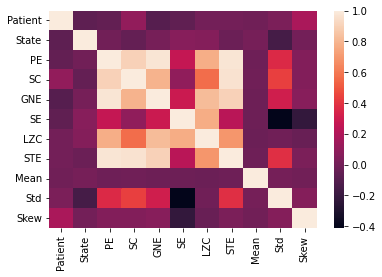

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(all_labeled.corr())
plt.show()

Con el método de correlación utilizado, podemos observar que existen variables que están correlacionadas linealmente tales como PE - STE, PE - GNE.

- En base a lo que podemos entender conceptualmente sobre nuestras variables, existe alguna que a priori pueda tener una mayor influencia sobre nuestro objetivo a predecir? por qué?

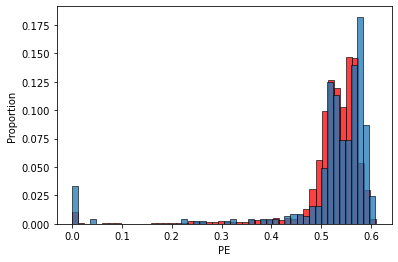

In [ ]:
state_0 = all_labeled[all_labeled['State'] == 0]
state_1 = all_labeled[all_labeled['State'] == 1]

sns.histplot(state_0['PE'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['PE'], bins=50, stat="proportion")

(0.2, 0.3)

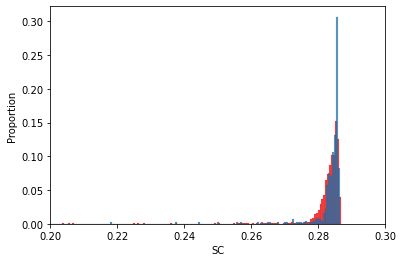

In [ ]:
sns.histplot(state_0['SC'], bins=500, color="red", stat="proportion")
sns.histplot(state_1['SC'], bins=500, stat="proportion")
plt.xlim(0.2, 0.3)

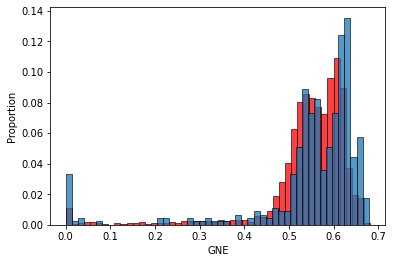

In [ ]:
sns.histplot(state_0['GNE'], bins=50, color="red",stat="proportion")
sns.histplot(state_1['GNE'], bins=50, stat="proportion")

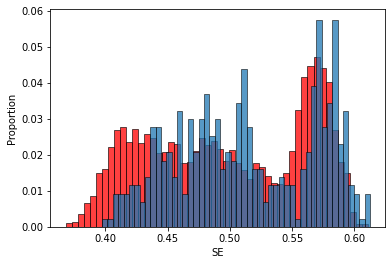

In [ ]:
sns.histplot(state_0['SE'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['SE'], bins=50, stat="proportion")

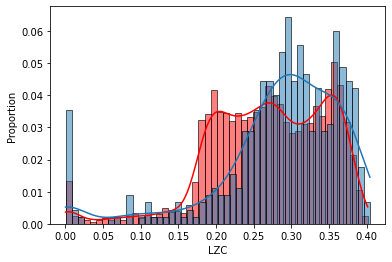

In [ ]:
sns.histplot(state_0['LZC'], bins=50, color="red", stat="proportion", kde=True)
sns.histplot(state_1['LZC'], bins=50, stat="proportion", kde=True)

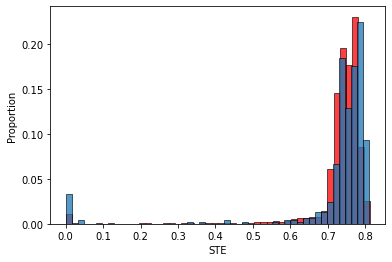

In [ ]:
sns.histplot(state_0['STE'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['STE'], bins=50, stat="proportion")

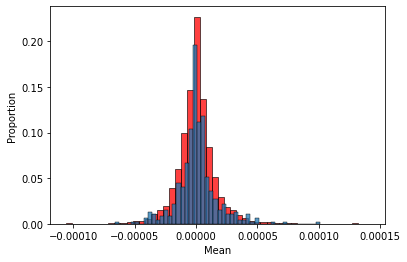

In [ ]:
sns.histplot(state_0['Mean'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['Mean'], bins=50, stat="proportion")

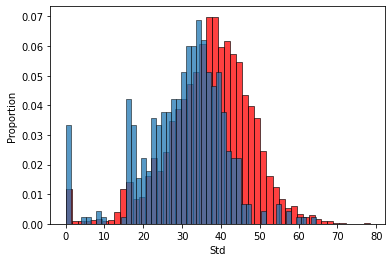

In [ ]:
sns.histplot(state_0['Std'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['Std'], bins=50,stat="proportion")

(-1.0, 1.0)

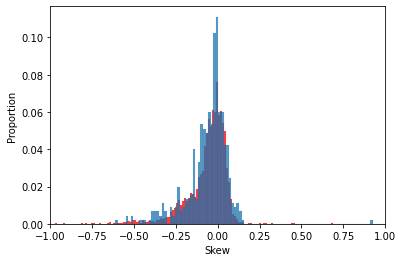

In [ ]:
sns.histplot(state_0['Skew'], bins=1000, color="red", stat="proportion")
sns.histplot(state_1['Skew'], bins=100, stat="proportion")
plt.xlim(-1, 1)
#CONSULTAR

A simple vista, notamos que existen cuantificadores que permiten una posible distinción entre el estado 0 y el 1 de los pacientes, comparando la distribución de los mismos. Entre ellos, se encuentran SE, LZC y Std. El resto de los cuantificadores presenta una distribución similar entre ambos estados, lo que dificultaría la distinción entre ellos.  

3. Visualizacion

- Como se distribuyen las variables? Cuales siguen una distribucion normal y cuales no?
- Explorar las diferencias entre las distribuciones de las distintas variables:
según el paciente según la etiqueta a predecir ambas (usar hue)
- Hay outliers presentes en nuestras distribuciones? habria que sacarlos?

Las variables PE, Mean, Std y Skew poseen distribución normal, mientras que SC, GNE, SE, LZC no. Con respecto a la variable STE, pensamos que puede tener distribución normal, sin embargo, notamos la presencia de un sesgo hacia la izquierda que nos hace dudar.
Con respecto a los outliers, vemos la presencia de valores extremos en multiples variables. Consideramos la necesidad de realizar analisis estadisticos para determinar si es correcto sacarlos o no.  

**Acrónimo de columnas:**

Valor medio (Mean)

Desvio estandar (Str)

Oblicuidad (Skew)

Entropía de permutación (PE)

Complejidad Estadistica (SC)

Entropia Globlal de Redes (GNE)

Complejidad de Lempel Ziv (LZC)

Entropía Tsallis (STE)